# Import Libraries

In [1]:
# data handling
import pandas as pd
import numpy as np

# ploting
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2  

# set up model
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc, fbeta_score

# save scaler and model
import pickle
from pickle import dump, load

In [2]:
df = pd.read_csv('data/finantier_data_technical_test_dataset.csv', index_col=False)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
0,4808-GHDJN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis (EDA)

In [3]:
# check dtypes and any missing values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7044 non-null   object 
 1   gender            7044 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of demographics of the customers, account information, consumption information, provided services and whether the customer defaulted on their telco payment.

In [4]:
# get total number of missing values
df.isnull().sum()

customerID          4
gender              4
SeniorCitizen       5
Partner             5
Dependents          5
tenure              5
PhoneService        5
MultipleLines       5
InternetService     5
OnlineSecurity      5
OnlineBackup        5
DeviceProtection    5
TechSupport         5
StreamingTV         5
StreamingMovies     5
Contract            5
PaperlessBilling    5
PaymentMethod       5
MonthlyCharges      5
TotalCharges        5
Default             5
dtype: int64

Since most of the columns do not have much missing values (only 4 - 5), I can safely remove any rows with missing values without any significant loss in data.

## Remove Missing Data

In [5]:
# remove rows with missing data
df.dropna(axis=0, inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


From the original 7048 rows, the remaining filled data consists of 7043 rows. Hence not much data is lost in this step.

## Remove Redundant Data

customerID does not provide any useful information in predicting default payments, hence I will remove it as well.

In [6]:
# remove customerID from df
df.drop('customerID', axis=1, inplace=True)

Look at the unique values of all columns:

In [7]:
# get all columns' names and unique values
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0. 1.]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
----------
PhoneService
['No' 'Yes']
----------
MultipleLines
['No phone service' 'No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------
OnlineBackup
['Yes' 'No' 'No internet service']
----------
DeviceProtection
['No' 'Yes' 'No internet service']
----------
TechSupport
['No' 'Yes' 'No internet service']
----------
StreamingTV
['No' 'Yes' 'No internet service']
----------
StreamingMovies
['No' 'Yes' 'No internet service']
----------
Contract
['Month-to-month' 'One year' '

All the columns appear to contain relevant data that are helpful in determining whether a person would default on his/her payment or not. Hence there is no need to remove any of the filled data.

## Fix Structural Errors

In [8]:
# get names of every column
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Default'], dtype=object)

### Categorical Data

Majority of these columns are categorical data:
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- PaperlessBilling
- PaymentMethod

Among these columns, there are some inconsistencies in the naming or grouping conventions. <br>
E.g. Binary columns should only contain "yes" and "No". These inconsistencies can introduce some inaccuracy in the predicting. Hence I will group 'No phone service' and 'No internet service' as 'No'.

In [9]:
# replace values into binary yes/no values
df['MultipleLines'].replace(to_replace="No phone service", value='No', inplace=True)

df['OnlineSecurity'].replace(to_replace="No internet service", value='No', inplace=True)
df['OnlineBackup'].replace(to_replace="No internet service", value='No', inplace=True)
df['DeviceProtection'].replace(to_replace="No internet service", value='No', inplace=True)
df['TechSupport'].replace(to_replace="No internet service", value='No', inplace=True)
df['StreamingTV'].replace(to_replace="No internet service", value='No', inplace=True)
df['StreamingMovies'].replace(to_replace="No internet service", value='No', inplace=True)

In [10]:
# check
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0. 1.]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
----------
PhoneService
['No' 'Yes']
----------
MultipleLines
['No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes']
----------
OnlineBackup
['Yes' 'No']
----------
DeviceProtection
['No' 'Yes']
----------
TechSupport
['No' 'Yes']
----------
StreamingTV
['No' 'Yes']
----------
StreamingMovies
['No' 'Yes']
----------
Contract
['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling
['Yes' 'No']
----------
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit ca

Since InternetService, Contract and PaymentMethod have more than 2 classes, I will use one-hot encoding (manually) to create new columns of their transformed numerical values for the Machine Learning or Deep Learning models to read. <br>
However, I will leave the one-hot encoding step till later since there is a need to gather more insights from the data.

For now, SeniorCitizen appears to be already binarised. However, its dtype is float instead of integer. Hence there is a need to convert it.

In [11]:
# convert SeniorCitizen from float to int
df = df.astype({"SeniorCitizen": int})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,Female,0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,Female,0,Yes,Yes,11.0,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Numerical Data
TotalCharges is a string instead of a numerical form. Convert it into float, just like tenure and MonthlyCharges. <br>
The tenure period is usually given as a whole number (eg. 3 or 12 months), hence I will convert its dtype to `int`.

In [12]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
198.6       1
3965.05     1
4932.5      1
1612.75     1
3833.95     1
Name: TotalCharges, Length: 6531, dtype: int64

It appears that some rows in TotalCharges are blank. I will remove these rows since there are only 11 of them, out of the 7043 rows. 

In [13]:
# add NaN to blank strings
df['TotalCharges'].replace(' ', np.nan, inplace=True)
# remove missing values
df.dropna(subset=['TotalCharges'], inplace=True)

In [14]:
# check
df['TotalCharges'].value_counts()

20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
           ..
4932.5      1
1612.75     1
2737.05     1
447.9       1
3833.95     1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
# convert dtypes
df = df.astype({"TotalCharges": float})
df = df.astype({"tenure": int})

In [16]:
# check
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0 1]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
----------
PhoneService
['No' 'Yes']
----------
MultipleLines
['No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes']
----------
OnlineBackup
['Yes' 'No']
----------
DeviceProtection
['No' 'Yes']
----------
TechSupport
['No' 'Yes']
----------
StreamingTV
['No' 'Yes']
----------
StreamingMovies
['No' 'Yes']
----------
Contract
['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling
['Yes' 'No']
----------
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
----------
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78

## Check for Outliers
I will use the Inter Quartile Range (IQR) method to seek out any possible outliers. <br>
Any value that lies beyond the range of -1.5 * IQR to 1.5 * IQR will be counted as an outlier.

IQR = Range between the 25th and 75th percentile

I chose this method as I felt that it is very simple and straightforward to understand.

In [17]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
            
    print("Outliers for:", col)
    print(out)
    
num_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_list:
    iqr_outliers(df[col])

Outliers for: tenure
[]
Outliers for: MonthlyCharges
[]
Outliers for: TotalCharges
[]


It appears that there are no outliers in the numerical features. Therefore there is no future processing steps needed.

## Visual Investigation on Data

### Hypothesis
From general knowledge, these are the possible ideas of the relationships with the features and the likelihood that the customer would default:

- The longer the contract duration, the lower the chances that the customer will default. This is because these customers face a lower occurence of paying the bills at the end of the contract. This is assuming that full payment is being made at the start of the contract. 
- A contract with fewer features are more likely to be terminated than those offering more additional features like Online Security and Backup since these bundles are usually offered at a more "value for money" rate than acquiring them separately. Customers may also to enjoy some of these features.
- Customers with spouses and children might be less likely to default as there are more people using the service. They could help to contribute with the bills, though it is also possible that the customer would face greater difficulty in paying them due to a heavy financial burden in supporting more people.
- More expensive contracts are likely to face default payments.


### Class Labels (Default)
Firstly, check the distribution of the target label (Default) to determine if the dataset is imbalanced:

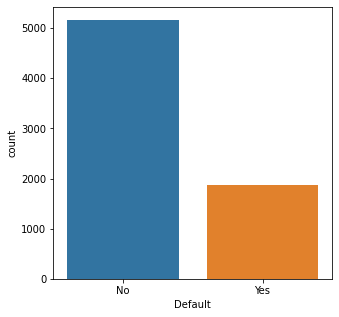

In [18]:
# check if imbalance
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Default'])
plt.show()

In [19]:
# get exact counts proportion
df['Default'].value_counts(normalize=True) * 100

No     73.421502
Yes    26.578498
Name: Default, dtype: float64

The dataset has 73% of the customers that did not defaulted on their payments. <br>
This is expected since we don't expect a significant group of people to default. <br>
Since the labels are undersampled, processing them may cause the Machine Learning or Deep Learning models to predict more false negatives. <br>
However, this can be taken into account in the evaluation metrics.

### Numerical Data

In [20]:
# look at general stats of the numeric columns
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [21]:
# create function to generate boxplots

plots = {1: [111],
        2: [121, 122],
        3: [131, 132, 133],
        4: [221, 222, 223, 224],
        5: [231, 232, 233, 234, 235],
        6: [231, 232, 233, 234, 235, 236]}

def boxplot(x,y,df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x,j]])
        ax.set_title(j)
        
    return plt.show()

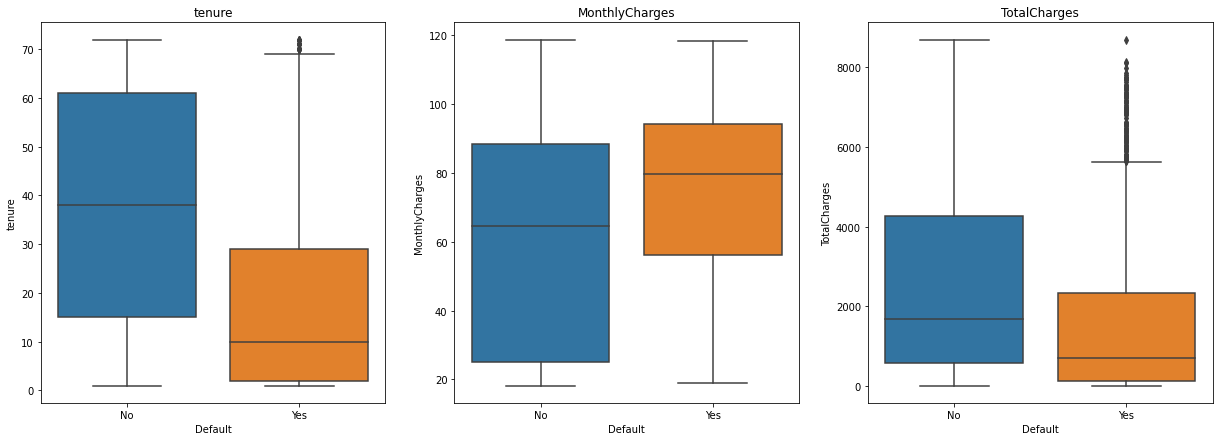

In [22]:
# create boxplots of numerical data
boxplot('Default', num_columns, df)

- Contracts with a higher tenure term face a lower likelihood of default. The median tenure term of defaulting customers is about 10 months, compared to the non-defaulters' median term of about 38 months.
- Contracts with a lower monthly charges face a lower likelihood of default. Median of defaulting customers is about 80, higher than the non-defaulters' 65.
- Surpisingly, contracts with a higher TotalCharges are more likely to face default payments.

### Categorical Data

In [23]:
# create function to generate countplots
def countplots(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df)
        ax.set_title(j)
        
    return plt.show()  

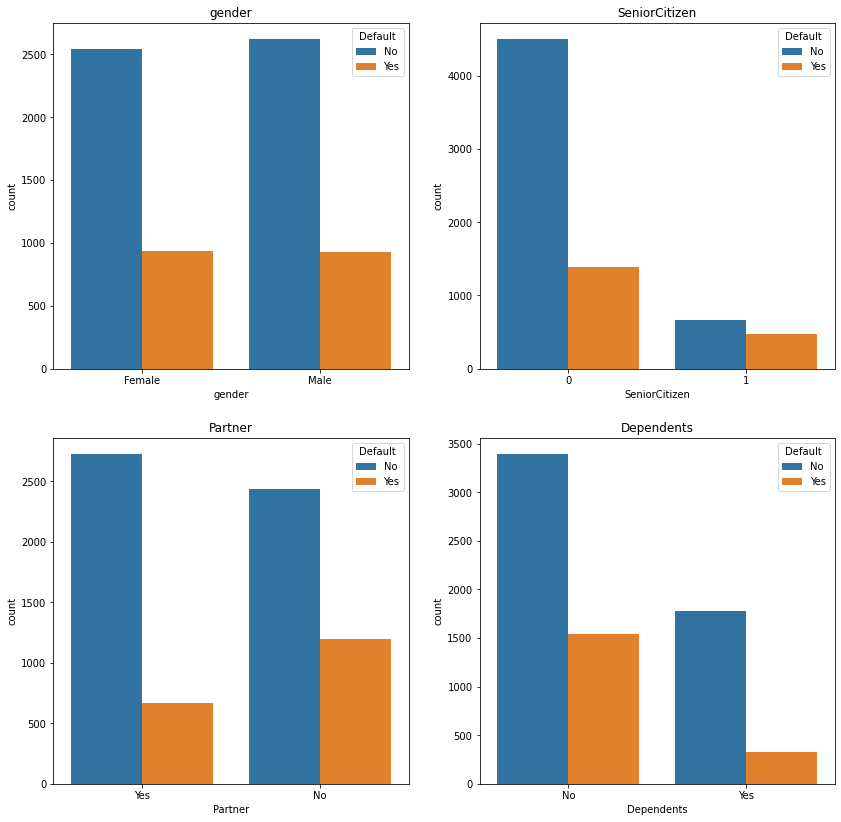

In [24]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

countplots('Default', demographic_columns, df)

- It appears that gender has no impact in predicting whether a customer would default or not.
- The chances of a default if the customer is a senior citizen is higher.
- Customers with a partner and dependents are less likely to default.

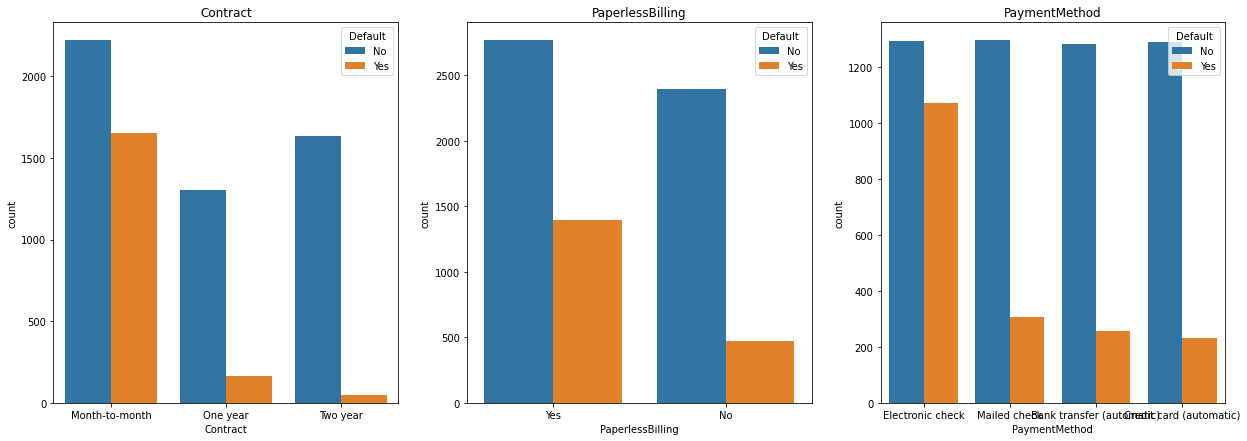

In [25]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

countplots('Default', account_columns, df)

- Month-to-month contracts have a much higher default rates compared to clients with yearly contracts.
- Contracts paid with electronic check are more likely to have higher default rates.
- Contracts with paperless billing are much more likely to have higher default rates.

# Feature Engineering
Generate any new features from the existing dataset. <br>
Encode categorical features and normalise numerical features. <br>
Have a look at the correlations between the features.

## Encode Categorical Data
I will simply convert the other categorical columns into binary numeric variables:
- Yes = 1
- No = 0
- Female = 1
- Male = 0

In [26]:
# create lists for easy reading
one_hot_list = ['InternetService', 'Contract', 'PaymentMethod']

bin_list = ['gender',
            'Partner',
            'Dependents',
            'PhoneService',
            'MultipleLines',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'PaperlessBilling',
            'Default'] # label

In [27]:
# manual hot-one encoding into dummy variables
# backup = df.copy()
df = pd.get_dummies(df, columns=one_hot_list)

In [28]:
# convert gender column
df['gender'] = df[bin_list].replace({'Female': 1, 'Male': 0})

# convert all yes/no columns
df[bin_list] = df[bin_list].replace({'Yes': 1, 'No': 0})

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7044,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7045,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7046,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Normalise Numerical Data

In [29]:
temp_df = pd.DataFrame(df, columns = num_columns)
df_remaining = df.drop(columns = num_columns)

min_max_scaler = MinMaxScaler()
X_num_norm = min_max_scaler.fit_transform(temp_df)


# create dataframe of normalised numerical features
temp_df = pd.DataFrame(X_num_norm, columns=num_columns, index=df_remaining.index)


# create final df with normalised numerical data with encoded data
final_df = pd.concat([df_remaining, temp_df], axis=1)
final_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0.000000,0.115423,0.001275
2,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0.464789,0.385075,0.215867
3,0,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,0.014085,0.354229,0.010310
4,0,0,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.619718,0.239303,0.210241
5,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,0,1,1,1,1,1,0,1,1,...,0,1,0,0,0,0,1,0.323944,0.662189,0.227521
7044,1,0,1,1,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1.000000,0.845274,0.847461
7045,1,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0.140845,0.112935,0.037809
7046,0,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0.042254,0.558706,0.033210


## Rename Column Names
Remove any spaces, dashes and brackets inside column names to adhere to naming conventions (and to avoid future errors).

In [30]:
# get names of every column
final_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Default',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)

In [31]:
# remove parenthesis
final_df.columns = final_df.columns.str.replace(r"\(.*\)","")

# replace whitespaces with underscore
final_df.columns = final_df.columns.str.replace(" ", "_")

# replace dash with underscore
final_df.columns = final_df.columns.str.replace("-", "_")

# check
final_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Default',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'Contract_Month_to_month',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Bank_transfer_', 'PaymentMethod_Credit_card_',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)

### Univariate Selection
Scikit-learn library's `SelectKBest` class features a suite of different statistical tests to select a specific number of features that has the strongest relationship with the target variable. <br>

To have a better sense of which features are relevant, I will use 2 statistical tests:
- analysis of variance (ANOVA) F-value
- chi-squared

I will also limit the results to just 10 features as it would be impratical to consider all 26 features. 


#### ANOVA F Test
ANOVA is a parametric statistical hypothesis test for determining whether the means from two or more data samples come from the same distribution.

The F Score is the ratio between the variance from two different samples or the explained and unexplained variance by ANOVA.

In [32]:
y = final_df["Default"]
X = final_df.copy().drop("Default", axis=1)

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','F Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'F Score'))  # print 10 best features

                          Features      F Score
16         Contract_Month_to_month  1375.797718
23                          tenure  1007.509431
14     InternetService_Fiber_optic   733.951530
18               Contract_Two_year   703.210304
21  PaymentMethod_Electronic_check   702.709162
15              InternetService_No   383.981781
25                    TotalCharges   291.344862
24                  MonthlyCharges   271.576990
12                PaperlessBilling   267.487636
17               Contract_One_year   230.627733


#### Chi-Squared
Since all the features are non-negative, the chi-squared statistic can be computed for all of the features. <br>
The chi-square test measures dependence between variables, helping to remove features that are the most likely to be independent of class and therefore irrelevant for classification.

In [33]:
y = final_df["Default"]
X = final_df.copy().drop("Default", axis=1)

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','chi-squared']  # naming the dataframe columns
print(featureScores.nlargest(10,'chi-squared'))  # print 10 best features

                          Features  chi-squared
16         Contract_Month_to_month   516.714004
18               Contract_Two_year   486.223101
21  PaymentMethod_Electronic_check   424.113152
14     InternetService_Fiber_optic   372.082851
15              InternetService_No   285.475152
23                          tenure   238.007569
17               Contract_One_year   176.608724
6                   OnlineSecurity   147.165601
9                      TechSupport   135.439602
1                    SeniorCitizen   133.482766


It appears that these features are the most useful in determining the likelihood of a default payment. <br>
Cross-check with correlation between the features and `Default`.

<AxesSubplot:>

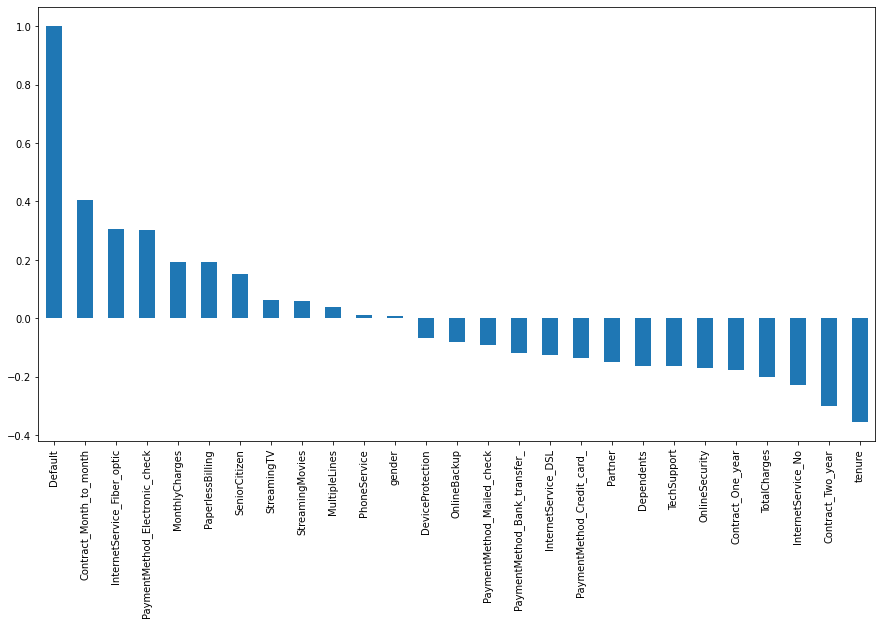

In [34]:
# get correlation of "Dafault" with other variables
plt.figure(figsize=(15,8))

final_df.corr()['Default'].sort_values(ascending = False).plot(kind='bar')

- Customers who sign up for a monthly contract, use fiber optic as their Internet Service and have electronic check as their payment method tend to default.
- Most of the additional services (e.g. `OnlineSecurity`, `TechSupport`, etc.) are generally not correlated to the default rate (except for `InternetService_Fiber_optic` and `InternetService_No`, hence considering a new feature that shows the number of these services offered in the contract is not likely to be useful.  
- Customers holding a longer tenure with a two-year contract tend to be able to commit to their payments.

Therefore, I will conclude that these would be the features that I deem useful in determining the likelihood of a default:
- Contract_Month_to_month
- Contract_Two_year
- tenure
- InternetService_Fiber_optic
- PaymentMethod_Electronic_check
- InternetService_No



# Modeling
DL model used: TabNet : Attentive Interpretable Tabular Learning <br>
[GitHub link](https://github.com/dreamquark-ai/tabnet) <br>
[Paper](https://arxiv.org/pdf/1908.07442.pdf)

## Set Up
Get encoded features:

In [35]:
# use only identified features in Feature Engineering step
# take the encoded categorical features
model_df = final_df[['Contract_Month_to_month',
                    'Contract_Two_year',
                    'InternetService_Fiber_optic',
                    'PaymentMethod_Electronic_check',
                    'InternetService_No',
                    'Default']]

# add in non-normalised tenure
model_df = pd.concat([model_df, df['tenure']], axis=1)

Get normalised features. <br>
Feature normalisation centers and normalises the data by subtracting the mean and dividing by the variance. <br>
If the entire dataset is used, the caculated mean and variance will have future information from the test set when the model is being trained on the normalised train set.


Therefore, perform feature normalisation over the training data only. Then perform normalisation on testing instances using the mean and variance of training explanatory variables. 

This is a more accurate way in evaluating whether the model can generalize well to new, unseen data points.

In [36]:
# create independent and depedendent variables
target = model_df["Default"]
features = model_df.copy().drop("Default", axis=1)

In [37]:
# train set
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.30, random_state=8)

# val set
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (4922, 6)
X validation shape:  (1055, 6)
X test shape:  (1055, 6)
Y train shape:  (4922,)
Y validation shape:  (1055,)
Y test shape:  (1055,)


In [38]:
# normalise only the train set
temp_df = pd.DataFrame(x_train, columns = ['tenure'])
df_remaining = x_train.drop(columns = ['tenure'])

# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(temp_df)
# transform the training dataset
X_num_norm = scaler.transform(temp_df)
# X_num_norm = min_max_scaler.fit_transform(temp_df)


# save the scaler for same scaling of new data
dump(scaler, open('saved_items/scaler.pkl', 'wb'))


# create dataframe of normalised numerical features
temp_df = pd.DataFrame(X_num_norm, columns= ['tenure'], index=df_remaining.index)

# replace old x_train with new one with normalised numerical data
x_train = pd.concat([df_remaining, temp_df], axis=1)

In [39]:
# normalise test set with same scaler used for the train set

# load the scaler
scaler = load(open('saved_items/scaler.pkl', 'rb'))

# transform the validation dataset
x_val = scaler.transform(x_val)

# transform the test dataset
x_test = scaler.transform(x_test)

According to the documentation, TabNet only accepts NumPy arrays as input. Hence there is a need to convert them. <br>
It appears that `x_val` and `x_test` were already converted into NumPy arrays during the normalisation step.

In [40]:
# convert all inputs into numpy arrays

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
# x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

# x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

## Build Model

In [41]:
# define model
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit model 
clf.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=100 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

Device used : cpu
epoch 0  | loss: 0.57913 | train_auc: 0.79194 | train_accuracy: 0.63876 | valid_auc: 0.73572 | valid_accuracy: 0.72227 |  0:00:01s
epoch 1  | loss: 0.50082 | train_auc: 0.81425 | train_accuracy: 0.7306  | valid_auc: 0.73305 | valid_accuracy: 0.74692 |  0:00:01s
epoch 2  | loss: 0.48987 | train_auc: 0.82675 | train_accuracy: 0.74949 | valid_auc: 0.72506 | valid_accuracy: 0.74692 |  0:00:02s
epoch 3  | loss: 0.49559 | train_auc: 0.8215  | train_accuracy: 0.74949 | valid_auc: 0.71256 | valid_accuracy: 0.74692 |  0:00:03s
epoch 4  | loss: 0.48675 | train_auc: 0.82036 | train_accuracy: 0.74949 | valid_auc: 0.73401 | valid_accuracy: 0.74692 |  0:00:04s
epoch 5  | loss: 0.49242 | train_auc: 0.81098 | train_accuracy: 0.76249 | valid_auc: 0.71741 | valid_accuracy: 0.74692 |  0:00:05s
epoch 6  | loss: 0.48619 | train_auc: 0.82925 | train_accuracy: 0.77448 | valid_auc: 0.73332 | valid_accuracy: 0.74692 |  0:00:06s
epoch 7  | loss: 0.50577 | train_auc: 0.82599 | train_accuracy: 0

epoch 63 | loss: 0.48605 | train_auc: 0.84934 | train_accuracy: 0.76473 | valid_auc: 0.72319 | valid_accuracy: 0.74502 |  0:00:52s
epoch 64 | loss: 0.49146 | train_auc: 0.84651 | train_accuracy: 0.74238 | valid_auc: 0.73298 | valid_accuracy: 0.72986 |  0:00:52s
epoch 65 | loss: 0.48253 | train_auc: 0.84786 | train_accuracy: 0.769   | valid_auc: 0.73141 | valid_accuracy: 0.74502 |  0:00:53s
epoch 66 | loss: 0.47438 | train_auc: 0.8484  | train_accuracy: 0.76107 | valid_auc: 0.72092 | valid_accuracy: 0.72986 |  0:00:54s
epoch 67 | loss: 0.48072 | train_auc: 0.84937 | train_accuracy: 0.75579 | valid_auc: 0.73148 | valid_accuracy: 0.73744 |  0:00:55s
epoch 68 | loss: 0.4829  | train_auc: 0.84879 | train_accuracy: 0.76432 | valid_auc: 0.7307  | valid_accuracy: 0.74028 |  0:00:56s
epoch 69 | loss: 0.48109 | train_auc: 0.84904 | train_accuracy: 0.76961 | valid_auc: 0.7214  | valid_accuracy: 0.74976 |  0:00:56s
epoch 70 | loss: 0.48741 | train_auc: 0.8471  | train_accuracy: 0.75416 | valid_auc

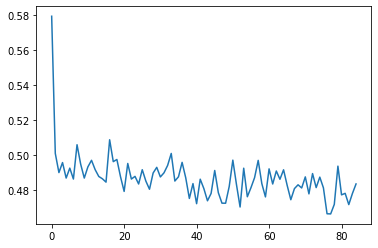

In [42]:
# plot losses
plt.plot(clf.history['loss'])

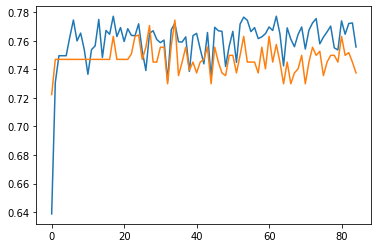

In [43]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

<AxesSubplot:>

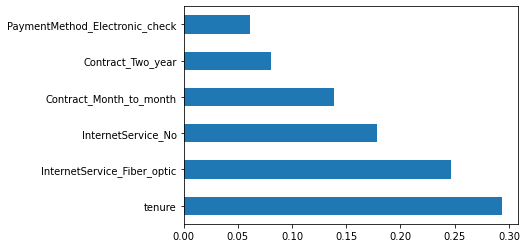

In [44]:
# make predictions
y_pred = clf.predict(x_test)

# plot feature importance
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
# show top 6 most important features
feat_importances.nlargest(6).plot(kind='barh')

## Evaluation
Since the dataset is imbalanced, using Classification Accuracy is not suitable since a high accuracy can already be achieved by just predicting the majoirty class (Default = 1).

I will start with the **Confusion Matrix**. It presents the number of observations that are predicted correctly and incorrectly. Thus, it can show the extend of which particular class is incorrectly classified. <br>
In a perfect classification, the confusion matrix will be all zeros except for the diagonal. All non-diagonal elements represent misclassifications.

Before moving into the next metric, there is a need to define some terms:
```
               | Positive Prediction | Negative Prediction
Positive Class | True Positive (TP)  | False Negative (FN)
Negative Class | False Positive (FP) | True Negative (TN)
```

Precision quantifies the number of correct positive predictions made:
```
Precision = True Positives / (True Positives + False Positives)
```
Recall quantifies the number of correct positive predictions made out of all positive predictions that could have been made.
```
Recall = True Positives / (True Positives + False Negatives)
```

Both precision and recall focuses on the positive and minority class (default) and are unconcerned with the true majority negatives (will not default).


Since this problem is more focused on identifying the default cases (True Positive), I will use the **precision-recall curve (PR Curve)**. It plots precision (y-axis) and recall (x-axis) for different probability thresholds. <br>
A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will appear as a horizontal line.

For simplicity, I will use the Precision-Recall AUC since it summarizes the curve with a range of threshold values as a single score. 1.0 represents a model with perfect skill.


Furthermore, I will use the **F2 Score** since False Negatives (unable to predict the customer will default) are more important. Maximising recall minimizes false negatives. Thus F2 Score forcuses on minimising false negatives than minimizing false positives.



### Metric 1: Confusion Matrix

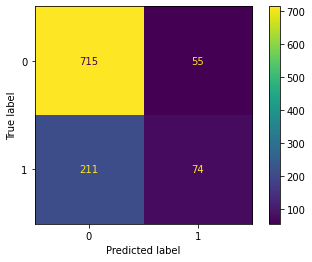

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       770
           1       0.57      0.26      0.36       285

    accuracy                           0.75      1055
   macro avg       0.67      0.59      0.60      1055
weighted avg       0.72      0.75      0.71      1055



In [45]:
# make the predictions
preds = clf.predict(x_test)

# construct the confusion matrix
cm = confusion_matrix(y_test, preds, labels=clf.classes_)

# visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
# print(cm)

print(classification_report(y_test, preds))

### Metric 2: Precision-Recall Area Under Curve (AUC) Score
#### 1. PR Curve for Test Set

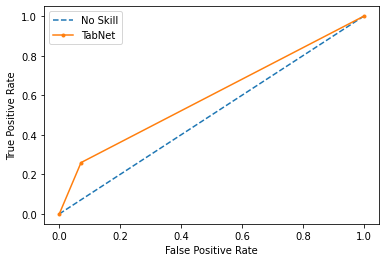

In [46]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# determine PR AUC for test set
preds = clf.predict(x_test)

fpr, tpr, _ = roc_curve(y_test, preds)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='TabNet')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### 2. PR AUC Score

In [47]:
# determine PR AUC for validation set
preds_val = clf.predict(x_val)
precision_val, recall_val, _ = precision_recall_curve(y_val, preds_val)
auc_score_val = auc(recall_val, precision_val)

# determine PR AUC for test set
preds = clf.predict(x_test)
precision_test, recall_test, _ = precision_recall_curve(y_test, preds)
auc_score_test = auc(recall_test, precision_test)

print(f"PR AUC SCORE ON VALIDATION SET: %.3f" % auc_score_val)
print(f"PR AUC SCORE ON TEST SET: %.3f" % auc_score_test)

PR AUC SCORE ON VALIDATION SET: 0.548
PR AUC SCORE ON TEST SET: 0.517


### Metric 3: F2 Score

In [48]:
# determine F2 for validation set
preds_val = clf.predict(x_val)
val_acc = fbeta_score(y_val, preds_val, beta=2)

# determine F2 for test set
preds = clf.predict(x_test)
test_acc = fbeta_score(y_test, preds, beta=2)

print(f"F2 SCORE ON VALIDATION SET: %.3f" % val_acc)
print(f"F2 SCORE ON TEST SET: %.3f" % test_acc)

F2 SCORE ON VALIDATION SET: 0.355
F2 SCORE ON TEST SET: 0.292


In the end, the model is only about 40% right in predicting whether a customer would default on telco payments based on his/her telco data.

In [49]:
# create a Pickle file using serialisation
import pickle
pickle_out = open("saved_items/classifier.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

# Test Model

In [50]:
# input information
features.columns

Index(['Contract_Month_to_month', 'Contract_Two_year',
       'InternetService_Fiber_optic', 'PaymentMethod_Electronic_check',
       'InternetService_No', 'tenure'],
      dtype='object')

In [51]:
# test classifier
inputs = [1, 0, 60,
          1, 1,
          1]

# normalise tenure with same scalar used for train set
scaler = load(open('saved_items/scaler.pkl', 'rb'))
# get single input of tenure and convert it as a 2D array
tenure_input = [[inputs[2]]]
# normalise input
tenure_input = scaler.transform(tenure_input)
# replace raw tenure with normalised tenure
inputs[2] = tenure_input[0][0]


# convert to readable format for classifier
inputs = torch.from_numpy(np.asarray(inputs))
clf.predict([inputs])

array([1], dtype=int64)

In [52]:
# predicted class with the highest probability
highest_proba = max(clf.predict_proba([inputs]).tolist()[0]) * 100
print("%.2f" % highest_proba + "%")

53.10%


**Additional Consideration** <br>
Possible actions to optimise model performance:
- Use more of the provided features
- Tune the number of k in SelectKBest via GridSearch CV
- Tune the parameters of the TabNet model via GridSearch CV or RandomSearchCV from `sklearn.model_selection`
- Try ensemble methods such as Random Forest Classifier, Gradient Boosting and XGBoost
- Consider several methods in handling imbalanced classification such as using Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class (customers who defaulted)

# Extra - Neural Network

In [53]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [54]:
# define model
nn = Sequential()
input_shape = x_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(input_shape, ), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              7168      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,057,793
Trainable params: 1,057,793
Non-trainable params: 0
_________________________________________________________________


In [55]:
# mc = ModelCheckpoint('saved_items/nn_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# # fit model
# fit_nn = nn.fit(x_train, y_train,
#                epochs=100,
#                verbose=False,
#                validation_data=(x_val, y_val),
#                batch_size=30,
#                callbacks=[mc])

best_nn = load_model('saved_items/nn_model.h5')

In [56]:
# make the predictions
preds_class = best_nn.predict_classes(x_test)
preds_class_1d = preds_class[:,0]

# construct the confusion matrix
confusion_matrix_result_nn = confusion_matrix(y_test, preds_class_1d)

# visualize the confusion matrix
print(confusion_matrix_result_nn)
print(classification_report(y_test, preds_class_1d))

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[732  38]
 [220  65]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       770
           1       0.63      0.23      0.34       285

    accuracy                           0.76      1055
   macro avg       0.70      0.59      0.59      1055
weighted avg       0.73      0.76      0.71      1055



In [57]:
# make the predictions
preds_class_val = best_nn.predict_classes(x_val)
preds_class_1d_val = preds_class_val[:,0]


# determine PR AUC for validation set
precision_val_nn, recall_val_nn, _ = precision_recall_curve(y_val, preds_class_1d_val)
auc_score_val_nn = auc(recall_val_nn, precision_val_nn)

# determine PR AUC for test set
precision_test_nn, recall_test_nn, _ = precision_recall_curve(y_test, preds_class_1d)
auc_score_test_nn = auc(recall_test_nn, precision_test_nn)

print(f"PR AUC SCORE ON VALIDATION SET: %.3f" % auc_score_val_nn)
print(f"PR AUC SCORE ON TEST SET: %.3f" % auc_score_test_nn)


# determine F2 for validation set
val_acc_nn = fbeta_score(y_val, preds_class_1d_val, beta=2)

# determine F2 for test set
test_acc_nn = fbeta_score(y_test, preds_class_1d, beta=2)

print(f"F2 SCORE ON VALIDATION SET: %.3f" % val_acc_nn)
print(f"F2 SCORE ON TEST SET: %.3f" % test_acc_nn)

PR AUC SCORE ON VALIDATION SET: 0.555
PR AUC SCORE ON TEST SET: 0.534
F2 SCORE ON VALIDATION SET: 0.313
F2 SCORE ON TEST SET: 0.261
